<a href="https://colab.research.google.com/github/Dhruvp187/Ridge_regression/blob/main/Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib as map

data = pd.read_csv('penguins_size.csv')

data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data.describe()
data.max()
data.value_counts()
data.info()
data.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    float64
dtypes: float64(5)
memory usage: 15.6 KB


culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                  float64
dtype: object

In [ ]:
data['species'] = data.species.astype('category')
data['sex'] = data.sex.astype('category')
data['island'] = data.island.astype('category')

data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [ ]:
df_min_max_scaled = data.copy()

column = 'culmen_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'culmen_depth_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'flipper_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'body_mass_g'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

data = df_min_max_scaled

print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0            0.254545         0.666667           0.152542     0.291667  1.0
1            0.269091         0.511905           0.237288     0.305556  2.0
2            0.298182         0.583333           0.389831     0.152778  2.0
4            0.167273         0.738095           0.355932     0.208333  2.0
5            0.261818         0.892857           0.305085     0.263889  1.0
..                ...              ...                ...          ...  ...
338          0.549091         0.071429           0.711864     0.618056  2.0
340          0.534545         0.142857           0.728814     0.597222  2.0
341          0.665455         0.309524           0.847458     0.847222  1.0
342          0.476364         0.202381           0.677966     0.694444  2.0
343          0.647273         0.357143           0.694915     0.750000  1.0

[333 rows x 5 columns]


In [ ]:
data.replace(to_replace=['MALE','FEMALE'] , value=["1.0", "2.0"], inplace=True)

data['sex'] = pd.to_numeric(data['sex'],errors = 'coerce')
data.dtypes


culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                  float64
dtype: object

In [ ]:
data = data.drop(['species','island'], axis=1)
data = data.drop(labels=[3,8,9,10,11,47,246,286,324,336,339], axis=0)


print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0                39.1             18.7              181.0       3750.0  1.0
1                39.5             17.4              186.0       3800.0  2.0
2                40.3             18.0              195.0       3250.0  2.0
4                36.7             19.3              193.0       3450.0  2.0
5                39.3             20.6              190.0       3650.0  1.0
..                ...              ...                ...          ...  ...
338              47.2             13.7              214.0       4925.0  2.0
340              46.8             14.3              215.0       4850.0  2.0
341              50.4             15.7              222.0       5750.0  1.0
342              45.2             14.8              212.0       5200.0  2.0
343              49.9             16.1              213.0       5400.0  1.0

[333 rows x 5 columns]


In [ ]:
X = data.drop("sex", 1)
Y = data['sex']

print("X=\n", X,"\n\nY=\n", Y)

X=
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[333 rows x 4 columns] 

Y=
 0      1.0
1      2.0
2      2.0
4      2.0
5      1.0
      ... 
338    2.0
340    2.0
341    1.0
342    2.0
343 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
def split(X, Y, test_size=0.2):

    i = int((1 - test_size) * X.shape[0])
    o = np.random.permutation(X.shape[0])

    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    Y_train, Y_test = np.split(np.take(Y,o), [i])
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split(X,Y)

xtrain = X_train
ytrain = Y_train
xtest = X_test
ytest = Y_test

# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)
print(xtrain)
print(ytrain)
print(xtest)
print(ytest)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
117              37.3             20.5              199.0       3775.0
87               36.9             18.6              189.0       3500.0
22               35.9             19.2              189.0       3800.0
222              48.7             14.1              210.0       4450.0
202              48.1             16.4              199.0       3325.0
..                ...              ...                ...          ...
223              50.0             15.2              218.0       5700.0
93               39.6             18.1              186.0       4450.0
203              51.4             19.0              201.0       3950.0
96               38.1             18.6              190.0       3700.0
101              41.0             20.0              203.0       4725.0

[266 rows x 4 columns]
117    1.0
87     2.0
22     2.0
222    2.0
202    2.0
      ... 
223    1.0
93     1.0
203    1.0
96     2.0
101    1.0
Nam

In [ ]:
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)


(266, 4)
(266,)
(67, 4)
(67,)


In [ ]:
X = data.flipper_length_mm.values
Y = data.sex.values

l = 0.28

X1_mat=np.vstack((np.ones(len(X)), X))
print(X1_mat.shape)

X_mat=np.vstack((np.ones(len(X)), X)).T

print(X_mat.shape)

beta_hat = np.linalg.inv((X_mat.T.dot(X_mat))+l*np.identity(2)).dot(X_mat.T).dot(Y)

print(beta_hat.shape)

# w=np.vstack((np.ones(len(beta_hat)), beta_hat)).T

w = beta_hat.T
print(w)

(2, 333)
(333, 2)
(2,)
[ 1.74800323 -0.51730213]


In [ ]:
lr = beta_hat.T*beta_hat
lr = l*lr
lr = (1/2)*lr

print(lr)


[0.42777214 0.03746421]


In [ ]:

ypred = np.dot(beta_hat,X1_mat)
print(ytrain.shape)

RSE = ((1/2)*(np.square(np.subtract(Y,ypred)))).mean()
RSE = (RSE + lr).mean()

print(RSE)


(266,)
0.3494827630044971


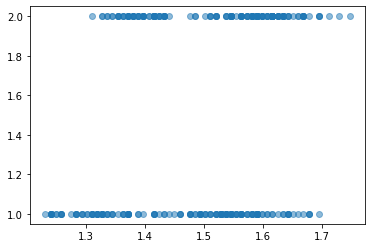

In [ ]:
plt.scatter(ypred, Y, alpha=0.5)
plt.show()